In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# loading csv file into dataframe
wine = pd.read_csv('wineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Text(0.5, 1.0, 'Degree of alcohol and density')

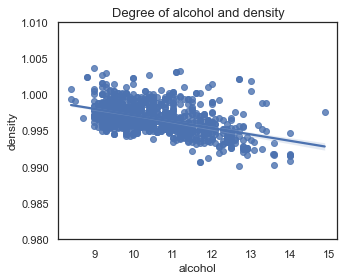

In [3]:
# plot alcohol vs. density
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
sns.regplot(x="alcohol",y="density",data=wine)
plt.ylim(0.98,1.01)
plt.title("Degree of alcohol and density",fontsize=13)

Text(0.5, 1.0, 'Degree of alcohol and pH')

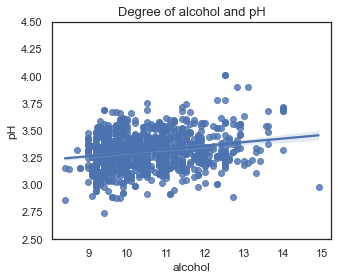

In [4]:
# plot alcohol vs. pH
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
sns.regplot(x="alcohol",y="pH",data=wine)
plt.ylim(2.5,4.5)
plt.title("Degree of alcohol and pH",fontsize=13)

<AxesSubplot:>

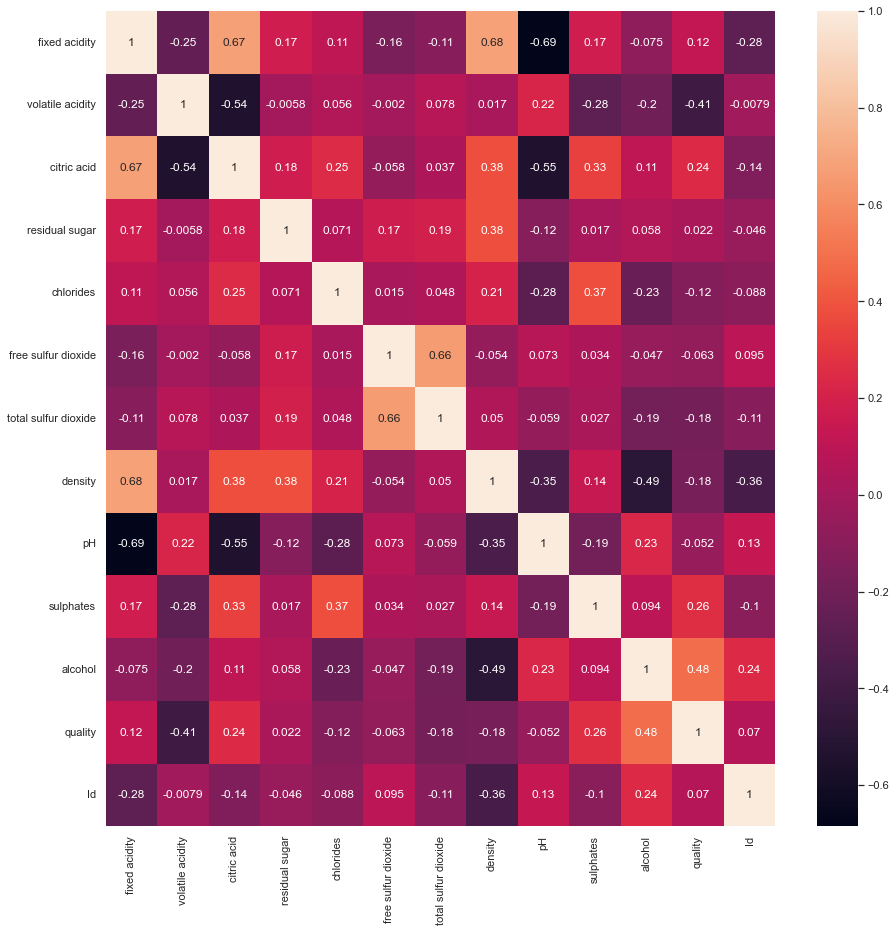

In [5]:
# correlation matrix
wine.corr()
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(wine.corr(), annot=True)

In [6]:
# define x and y, and split the test and train data
X = wine.drop(["quality"], axis=1).copy()
y = wine["quality"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [7]:
# import 5-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [8]:
# perfrom standarization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# perform 5-fold cross validation and accuracy score
k = 5
kf = KFold(n_splits=k)

result1 = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
result2 = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
result3 = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f"Decision Tree Avg accuracy:{result1.mean()}\nKNN Avg accuracy:{result2.mean()}\nRandom Forest Avg accuracy:{result3.mean()}")

Decision Tree Avg accuracy:0.5075000000000001
KNN Avg accuracy:0.56375
Random Forest Avg accuracy:0.62625


In [10]:
# perfrom decision tree, random forest, k-neighbor
m = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for i in m:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(str(i))
    print(classification_report(y_test, y_pred,zero_division=1))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.08      0.14      0.11         7
           5       0.68      0.65      0.66       147
           6       0.57      0.57      0.57       134
           7       0.58      0.47      0.52        53
           8       0.00      0.00      0.00         2

    accuracy                           0.58       343
   macro avg       0.32      0.47      0.31       343
weighted avg       0.60      0.58      0.59       343

KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.63      0.62      0.63       147
           6       0.46      0.57      0.51       134
           7       0.50      0.30      0.38        53
           8       1.00      0.00      0.00         2

    accuracy                 

In [11]:
# examine importance of different features of each variable in decision tree model
dt.fit(X_train, y_train)
dt.feature_importances_


array([0.096441  , 0.08550265, 0.05036511, 0.05162287, 0.06668529,
       0.07658639, 0.11624405, 0.03604647, 0.06390001, 0.12249971,
       0.16879576, 0.06531069])

In [12]:
# assign features with corresponding x-variable names and order them in a decending order
feature_names = X.columns
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0,ascending=False)
feature_importance

,0
alcohol,0.168796
sulphates,0.122500
total sulfur dioxide,0.116244
fixed acidity,0.096441
volatile acidity,0.085503
free sulfur dioxide,0.076586
chlorides,0.066685
Id,0.065311
pH,0.063900
residual sugar,0.051623
